## Headless Datashader with Matplotlib SVG Output

[datashader](https://github.com/bokeh/datashader) can directly generate .png output using `ds.utils.export_image`, but if you need SVG output with axes, labels, etc., you can use the [HoloViews](http://holoviews.org) datashader support (as of 2/2017, requires `conda install -c ioam/label/dev holoviews`).  For instance, here's an example of generating an SVG file directly to disk using matplotlib, which can be done in a Python script without Jupyter (though we use Jupyter's rich display at the very end to show the results here in a notebook):

In [1]:
import pandas as pd
import holoviews as hv
import geoviews as gv
import datashader as ds
import holoviews.plotting.mpl
from holoviews.operation.datashader import datashade

df = pd.read_hdf('data/census.h5', 'census')

In [2]:
color_key = {'w':'blue', 'b':'green', 'a':'red', 'h':'orange', 'o':'saddlebrown'}
points = hv.Points(gv.Dataset(df, kdims=['meterswest', 'metersnorth'], vdims=['race']))

race = datashade(points, x_sampling=10, y_sampling=10, cmap=color_key,
                 element_type=gv.Image, aggregator=ds.count_cat('race'))

renderer = hv.Store.renderers['matplotlib'].instance(fig='svg', holomap='gif')
renderer.save(race, 'race')

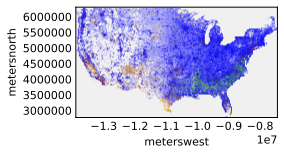

In [3]:
from IPython.display import SVG
SVG(filename='race.svg')